# CV and pure error on noisy circuit evaluation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [3]:
main_dir = '../data/NoiseCurve/'
NUM_PACKETS = 7
cv = np.transpose([[np.load(main_dir + f'C{j}/losses_cv_{i}.npy') for i in range(40)] \
                for j in range(1, NUM_PACKETS+1)], axes=(1,0,2))
noisy = np.transpose([[np.load(main_dir + f'C{j}/losses_noisy_{i}.npy') for i in range(40)] \
                for j in range(1, NUM_PACKETS+1)], axes=(1,0,2))
cv = cv.reshape((4, 10, NUM_PACKETS*20))
noisy = noisy.reshape((4, 10, NUM_PACKETS*20))

p = np.array([np.linspace(1, 10, 10) * 10**(i-5) for i in range(4)])
print(f"Phase domain shape: {p.shape}")
cv_avg, cv_std = np.mean(cv, axis=-1), np.std(cv, axis=-1)
noisy_avg, noisy_std = np.mean(noisy, axis=-1), np.std(noisy, axis=-1)
print(f"Phase range shape: {cv_avg.shape}")

Phase domain shape: (4, 10)
Phase range shape: (4, 10)


In [4]:
cv_avg = cv_avg[:,:-1].reshape((-1,))
cv_std = cv_std[:,:-1].reshape((-1,))
noisy_avg = noisy_avg[:,:-1].reshape((-1,))
noisy_std = noisy_std[:,:-1].reshape((-1,))
p = p[:,:-1].reshape((-1,))

In [5]:
# Interpolate the difference between the noisy and noiseless avg losses
from scipy.interpolate import interp1d as itp
poly = np.polyfit(p, noisy_avg - cv_avg, 3)
ps = np.array([np.linspace(1, 10, 50) * 10**(i-5) for i in range(4)])[:,:-1].reshape((-1,))
poly = np.polyval(poly, ps)

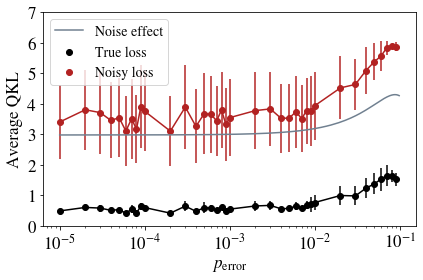

In [11]:
plt.scatter(p, cv_avg, label="True loss", c='black')
plt.scatter(p, noisy_avg, label="Noisy loss", c='firebrick')
plt.plot(ps, poly, label="Noise effect", c='slategrey')
# plt.scatter(p, noisy_avg - cv_avg, c='slategrey')
plt.xscale('log')

FONT_SIZE = 17
plt.yticks(fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.xlabel(r"$p_{\mathrm{error}}$", fontsize=FONT_SIZE)
plt.ylabel(r"Average QKL", fontsize=FONT_SIZE)
plt.legend(fontsize=14)
plt.ylim(0, 7)
plt.errorbar(p, cv_avg, np.log(cv_std), c='black')
plt.errorbar(p, noisy_avg, np.log(noisy_std), c='firebrick')
plt.tight_layout()
plt.savefig("/Users/jonathanlu/Documents/data_sym/Noise.pdf")